<a href="https://colab.research.google.com/github/OUCHAOUA/project_banking/blob/master/banking_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Études de cas :** 

## **Campagne de marketing direct (via téléphone) d'une institution bancaire purtugaise**

## **objectif est de prédire si le client souscrira un dépôt à terme**


**Cet ensemble de données concerne les campagnes de marketing par appel téléphonique direct, qui visent à promouvoir les dépôts à terme auprès des clients existants, par une institution bancaire portugaise de mai 2008 à novembre 2010.**

**Il est accessible au public dans le référentiel UCI Machine Learning, qui peut être récupéré sur** https://archive.ics.uci.edu/ml/datasets/Bank+Marketing





## [Commençons](#7)

## [A- Exploration des données](#1)
## [B- Analyse des données](#2)
## [C- Visualisation des données](#3)
## [D- Selections des Attributs](#4)
## [E- Model d'apprentissage](#5)
## [F- Conclusions](#6)


# Commençons... <a name= '7'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Load the raw data

In [2]:
url = 'https://raw.githubusercontent.com/OUCHAOUA/project_banking/master/bank-additional-full.csv'
dataset = pd.read_csv(url, sep = ';')

In [3]:
print("L'ensemble de données marketing banquaire se compose de :")
print("Numbre de ligne:", dataset.shape[0])
print("Numbre de Colonne:", dataset.shape[1])

L'ensemble de données marketing banquaire se compose de :
Numbre de ligne: 41188
Numbre de Colonne: 21


Il y a 41 188 observations dans ce jeu de données. Chacun représente un client existant que la banque a atteint via des appels téléphoniques.
Pour chaque observation, l'ensemble de données enregistre 21 variables d'entrée qui représentent à la fois les attributs qualitatifs et quantitatifs du client.
Il existe une seule variable de sortie binaire qui indique «yes» ou «no» révélant les résultats des appels téléphoniques.

In [4]:
dataset.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon



# **Explorez** l'ensemble de données  <a name= '1'></a>

## Description des Variables :

### Données clients de la banque:<br>
1 - age (numerique)<br>
2 - job : type d'emploi  =  (catégoriel: «admin.», «cols bleus», «entrepreneur», «femme de ménage», «gestion», «retraité», «travailleur indépendant», «services», «étudiant», «technicien» , 'chômeur', 'inconnu')<br>
3 - marital : état matrimonial = (catégorique: 'divorcé', 'marié', 'célibataire', 'inconnu'; note: 'divorcé' signifie divorcé ou veuf)<br>
4 - education : (catégorique: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illettrate', 'professional.course', 'university.degree', 'unknown')<br>
5 - default: a un crédit en défaut? (catégorique: 'non', 'oui', 'inconnu')br>
6 - housing: a un prêt au logement? (catégorique: 'non', 'oui', 'inconnu')<br>
7 - loan: a un prêt personnel? (catégorique: 'non', 'oui', 'inconnu')<br>

## Données liées au dernier contact de la campagne en cours: <br>
8 - contact: type de communication de contact (catégoriel: 'cellulaire', 'téléphone')<br> 
9 - month: dernier mois de l'année de contact (catégoriel: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: dernier jour de contact de la semaine (catégoriel: 'lun', 'mar', 'mer', 'jeu', 'ven')<br>
11 - duration: durée du dernier contact, en secondes (numérique). <br>

## Autres attributs:<br>
12 - campaign: nombre de contacts effectués pendant cette campagne et pour ce client (numérique, inclut le dernier contact)<br>
13 - pdays: nombre de jours qui se sont écoulés après que le client a été contacté pour la dernière fois à partir d'une campagne précédente (numérique; 999 signifie que le client n'a pas été contacté précédemment)<br>
14 - previous: nombre de contacts réalisés avant cette campagne et pour ce client (numérique)<br>
15 - poutcome: résultat de la campagne marketing précédente (catégorique: 'échec', 'inexistant', 'succès')<br>

## Attributs du contexte social et économique: <br>
16 - emp.var.rate: taux de variation de l'emploi - indicateur trimestriel (numérique)<br>
17 - cons.price.idx: indice des prix à la consommation - indicateur mensuel (numérique) <br>
18 - cons.conf.idx: indice de confiance des consommateurs - indicateur mensuel (numérique)<br> 
19 - euribor3m: taux euribor 3 mois - indicateur journalier<br>
20 - euribor3m: nombre d'employés - indicateur trimestriel (numérique)<br>

## Variable de sortie (target):<br>
21 - y - le client a-t-il souscrit un dépôt à terme? (binaire: 'oui', 'non')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Vérification des valeurs manquantes

In [6]:
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Il n'y a aucune valeur manquante dans l'ensemble de données.

# Analyse des **données** <a name= '2'></a>

## Target Analyse

In [7]:
dataset.rename(index=str, columns={'y': 'label'}, inplace = True)
target = 'label'

In [8]:
plt.style.use('fivethirtyeight')

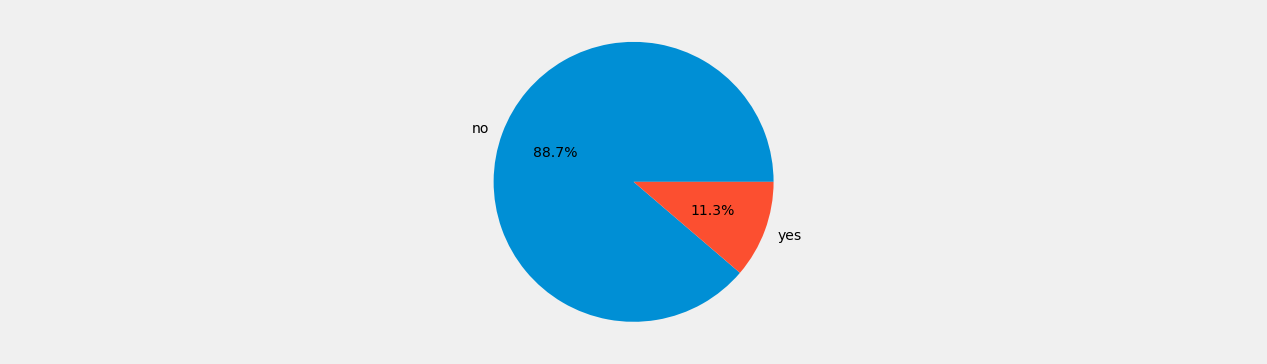

In [9]:
fig, axs = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(20, 6))
ax = dataset['label'].value_counts().plot.pie(autopct='%1.1f%%', ax = axs[1])                         

Remarques :

- l'ensemble de données donné a deux classes dans la variable cible,
- il s'agit donc d'un problème de classification binaire
- l'ensemble de données est **fortement déséquilibré de classe** avec une classe (**non** avec **88,73%** et une classe **oui** avec **11,27%**.)

## Analyse des variables catégorielles

In [10]:
category_cols = list(dataset.select_dtypes(include=['object']))
category_cols.remove(target)

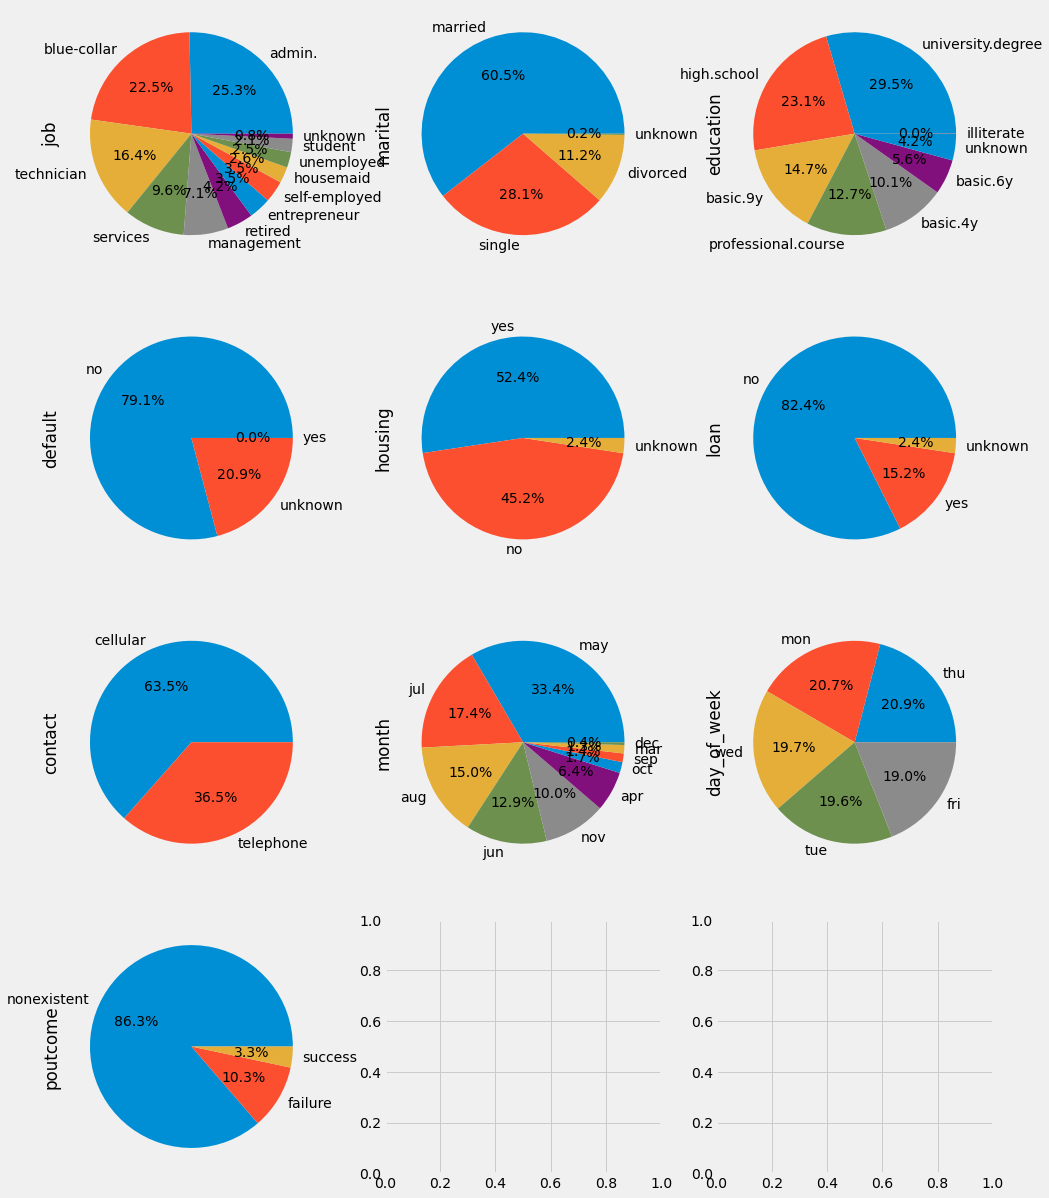

In [11]:
row_plt = 3
fig, axs = plt.subplots(4, row_plt, sharex=False, sharey=False, figsize=(15, 20))

counter = 0
for cat_column in category_cols:
    
    value_counts = dataset[cat_column].value_counts()
    ax_x, ax_y, x_pos = counter // row_plt, counter % row_plt , np.arange(0, len(value_counts))
    counter += 1  
    value_counts.plot.pie(ax=axs[ax_x, ax_y], autopct='%1.1f%%')   

plt.show()

Remarques  :

* Les caractéristiques catégorielles "job", "marital", "education", "default", "loan" ont la valeur 'unknown' qui peut être considérée comme des valeurs manquantes.

* Ces valeurs peuvent ne pas pouvoir être obtenues. Nous les traitons donc comme une valeur distincte.

* "marital" a un très faible nombre de valeurs 'unknown'.

Par conséquent, on modiferas "unknown" que pour "job" et "education" et nous ne supprimons ni n'imputons de valeurs 'unknown' pour les caractéristiques restons.

## Gestion de la valeur 'Unknown'
###modification de la valeur dans Education et job selon la logique

Selon son poste actuel on peu imaginer le niveau d'éducation 


In [12]:
dataset.loc[(dataset['education'] =='unknown') & (dataset['job']=='management'), 'education'] = 'university.degree'
dataset.loc[(dataset['education'] =='unknown') & (dataset['job']=='services'), 'education'] = 'high.school'
dataset.loc[(dataset['education'] =='unknown') & (dataset['job']=='housemaid'), 'education'] = 'basic.4y'

Pour ceux qui ont plus de 60 ans on imagine qu'ils sont retraité

In [13]:
dataset.loc[(dataset['job'] =='unknown') & (dataset['age']>60), 'job'] = 'retired'

Selon le niveau d'éducation on imagine le poste occupé.

In [14]:
dataset.loc[(dataset['job'] =='unknown') & (dataset['education']=='basic.4y'), 'job'] = 'blue-collar'
dataset.loc[(dataset['job'] =='unknown') & (dataset['education']=='basic.6y'), 'job'] = 'blue-collar'
dataset.loc[(dataset['job'] =='unknown') & (dataset['education']=='basic.9y'), 'job'] = 'blue-collar'
dataset.loc[(dataset['job'] =='unknown') & (dataset['education']=='professional.course'), 'job'] = 'technician'

### modification de la valeur dans previous, poutcome et pdays

In [15]:
dataset[['previous', 'poutcome', 'pdays']][(dataset['pdays'] == 999) & (dataset['poutcome'] == 'failure')].value_counts()

previous  poutcome  pdays
1         failure   999      3696
2         failure   999       349
3         failure   999        50
4         failure   999        12
5         failure   999         2
6         failure   999         1
dtype: int64

pdays = 999 signifier que le client n'a jamais étais contacté<br> 
ce qui explique que **poutcome ne peu avoir une valeur 'failure' ni previous différent de 0**

In [16]:
dataset.loc[dataset['pdays'] == 999, 'previous'] = 0
dataset.loc[dataset['pdays'] == 999, 'poutcome'] = 'nonexistent'

## visualisation des donner catégorique.

In [17]:
def cat_visualisation(df, feature, sorted=True):
    
    value_counts = df[feature].value_counts()
    x_sum = value_counts.sum()
    xlab = pd.DataFrame(value_counts.apply(lambda x: 100 * x / x_sum)).T
    ax = xlab.plot.barh(stacked=True, figsize=(20,2))
    plt.legend(mode="expand", loc = 8, ncol=df[feature].nunique())
    for p in ax.patches:
            left, bottom, width, height = p.get_bbox().bounds
            ax.annotate(str(round(width,2)), xy=(left+width/2, bottom+height/2), ha='center', va='center') 
    labels = pd.DataFrame()
    labels['%_Contactés'] = df[feature].value_counts()
    labels['%_Abonnés'] = df[feature][df['label'] == 'yes'].value_counts()
    labels['Taux_de_réussite'] = round((labels['%_Abonnés']/( labels['%_Contactés']))*100,2)
   
    if sorted : labels = labels.sort_values(by=['Taux_de_réussite'], ascending=False)
    else : labels = labels.sort_index()
    labels = labels.apply(lambda x: 100 * x / x.sum())
    ax = labels.plot(kind = 'line',figsize=(20,6), color = ('orange', 'red', 'blue'), 
                     marker = 'o',title = str(feature)+ ' -- statut / distribution')
    if sorted : plt.xticks(range(0,len(labels.index)), labels.index, rotation=-15) 
    else : plt.xticks(labels.index, labels.index, rotation=-15)

    plt.axhline(y=labels['%_Contactés'].mean(), linewidth=1, color="b", linestyle='--')

    return labels.T


,student,retired,unemployed,admin.,management,unknown,technician,self-employed,housemaid,entrepreneur,services,blue-collar
%_Contactés,2.124405,4.226959,2.461882,25.303486,7.099155,0.480723,16.395552,3.450034,2.573565,3.535010,9.636302,22.712926
%_Abonnés,5.926724,9.525862,3.103448,29.137931,7.068966,0.474138,15.754310,3.211207,2.284483,2.672414,6.961207,13.879310
Taux_de_réussite,19.501148,15.753552,8.810573,8.047403,6.961593,6.893342,6.713408,6.508655,6.204629,5.286344,5.050568,4.268785


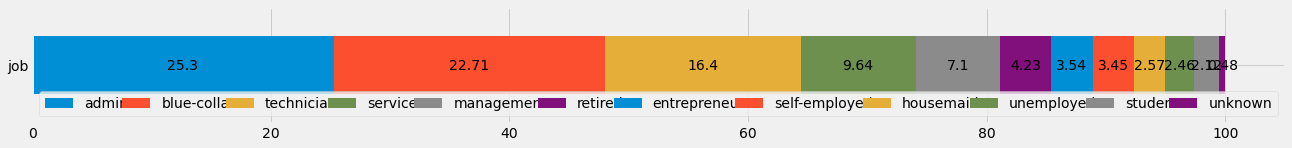

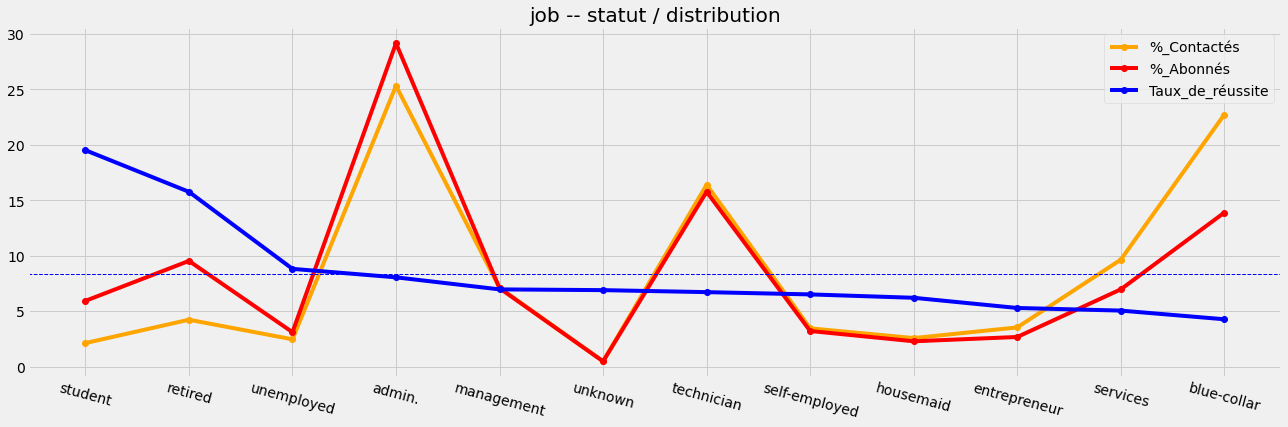

In [18]:
cat_visualisation(dataset, 'job')

nous remarquant que les **«student» et les «retired»** ont le taux de réussite le plus important de la campagne.

ce constat sera sûrement confirmé par l'analyse de l'âge.

,illiterate,unknown,university.degree,professional.course,high.school,basic.4y,basic.6y,basic.9y
%_Contactés,0.043702,3.437895,29.841216,12.729436,23.465572,10.240847,5.564728,14.676605
%_Abonnés,0.086207,4.461207,36.422414,12.823276,22.629310,9.331897,4.051724,10.193966
Taux_de_réussite,22.424059,14.754264,13.876274,11.454234,10.959734,10.364315,8.275305,7.891816


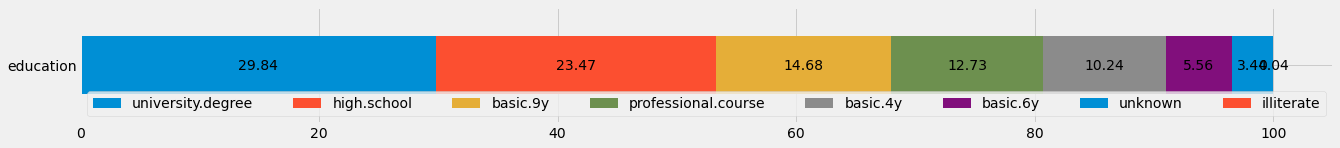

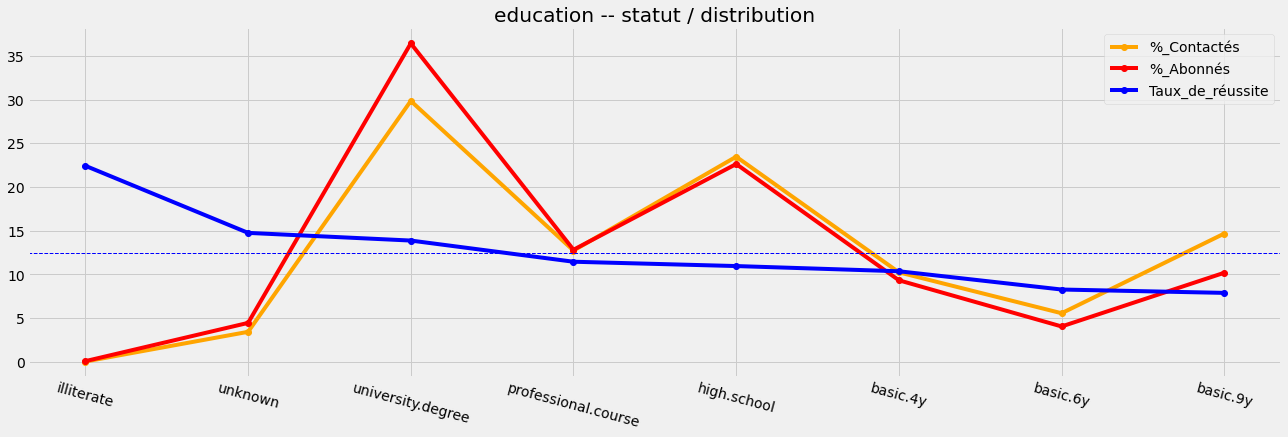

In [19]:
cat_visualisation(dataset, 'education')

les clients **"university.degree"** réponds positivement à la campagne

,unknown,single,divorced,married
%_Contactés,0.194231,28.085850,11.197436,60.522482
%_Abonnés,0.258621,34.913793,10.258621,54.568966
Taux_de_réussite,30.315279,28.294260,20.856912,20.533549


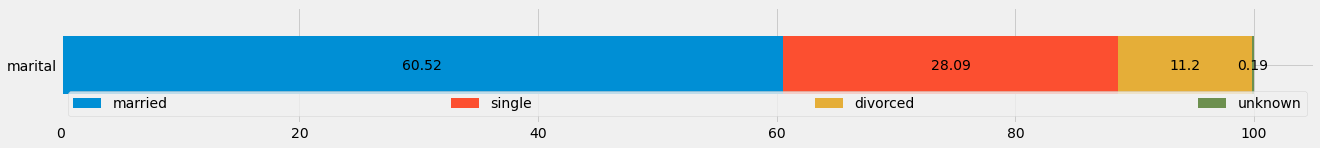

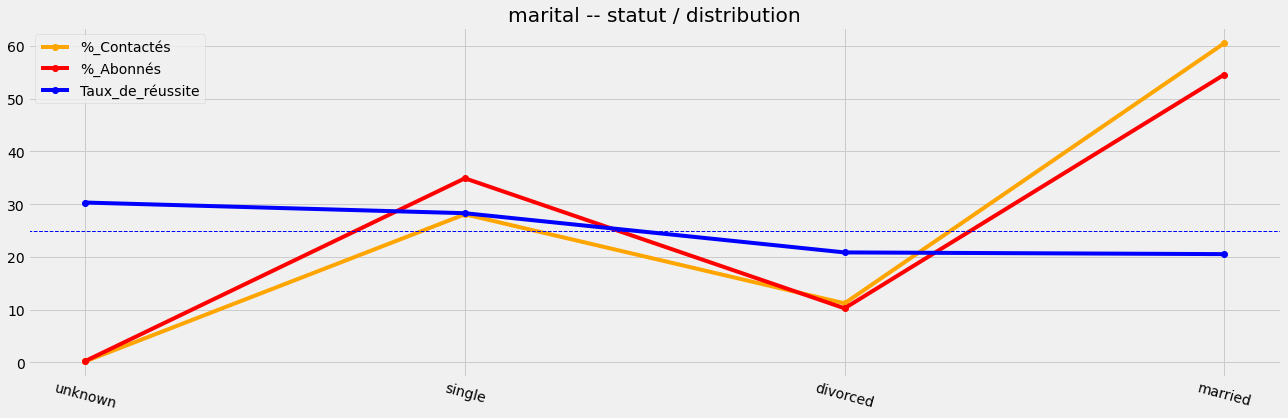

In [20]:
cat_visualisation(dataset, 'marital')

les célibataires **«single»** réponds positivement à la campagne

,no,unknown,yes
%_Contactés,79.120132,20.872584,0.007284
%_Abonnés,90.452586,9.547414,NaN
Taux_de_réussite,71.436495,28.563505,NaN


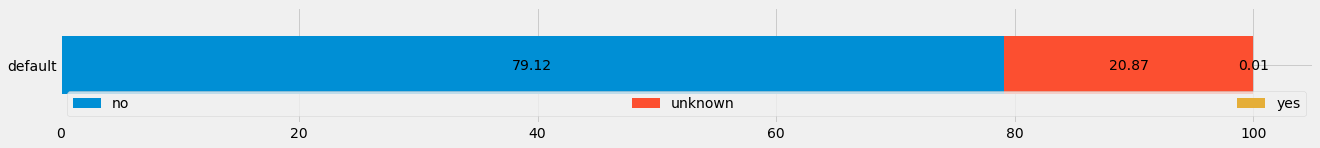

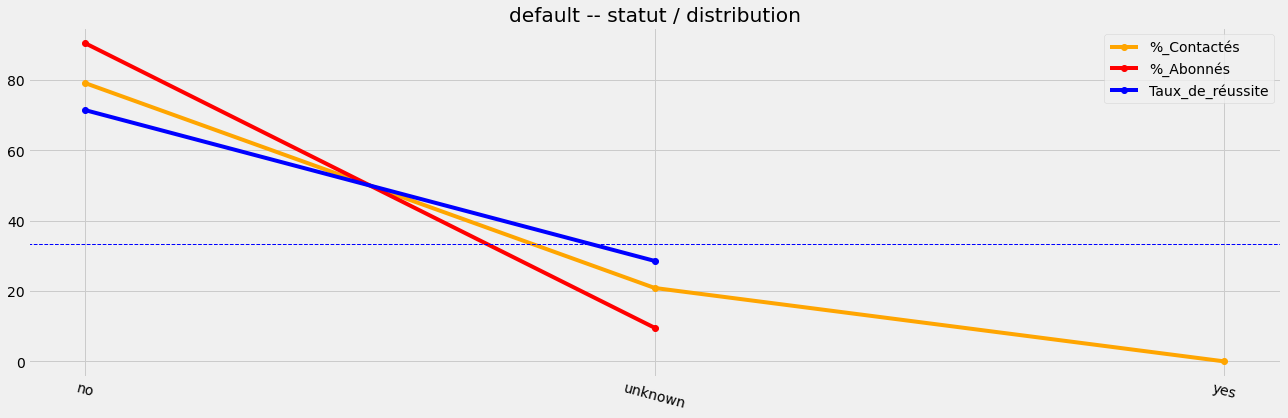

In [21]:
cat_visualisation(dataset, 'default')

les clients sans défaut de crédit réponds positivement à la campagne

,no,yes,unknown
%_Contactés,82.426920,15.169467,2.403613
%_Abonnés,82.974138,14.719828,2.306034
Taux_de_réussite,34.280532,33.041112,32.678356


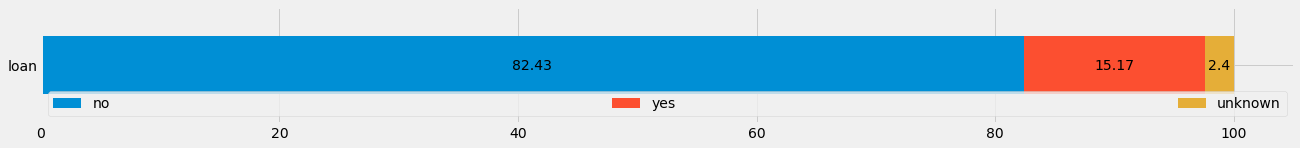

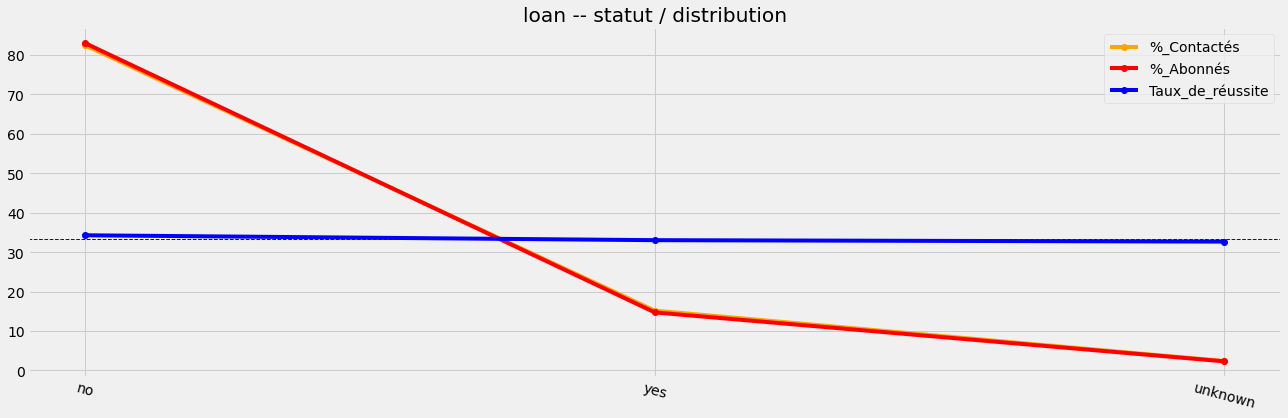

In [22]:
cat_visualisation(dataset, 'loan')

Avoir ou non un crédit n'influence pas le résultat de la campagne

,yes,no,unknown
%_Contactés,52.384190,45.212198,2.403613
%_Abonnés,54.030172,43.663793,2.306034
Taux_de_réussite,34.884419,32.662864,32.452717


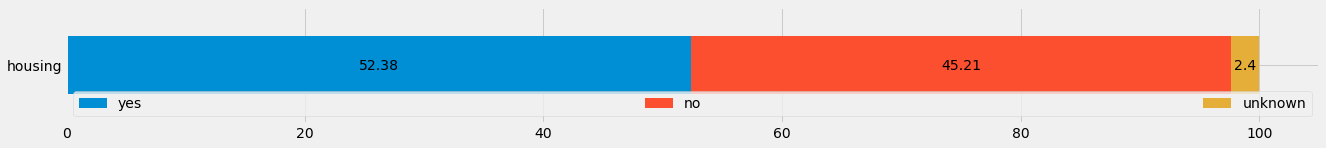

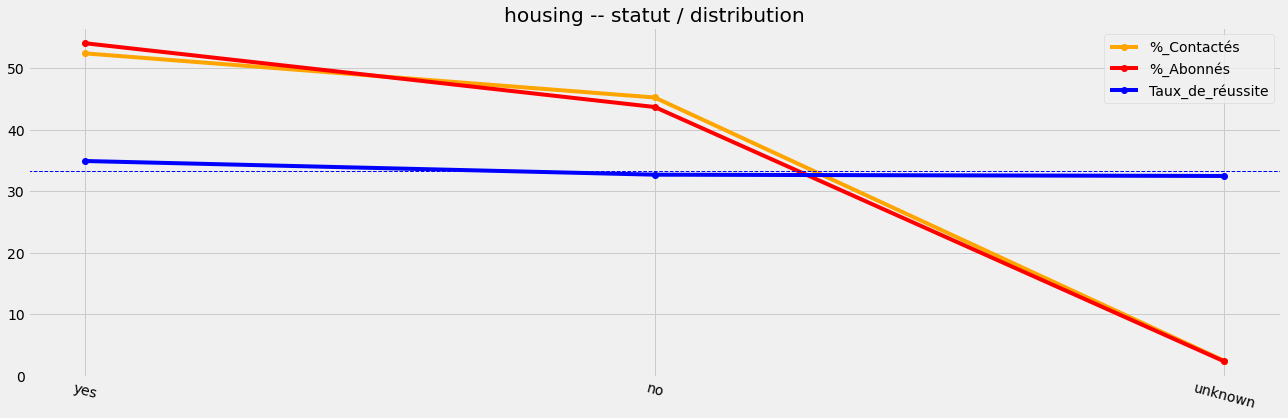

In [23]:
cat_visualisation(dataset, 'housing')

Avoir ou non un crédit maison n'influence pas le résultat de la campagne

Pour **"housing" et "loan"** l'écart est infime pour le prendre en considération

,cellular,telephone
%_Contactés,63.474798,36.525202
%_Abonnés,83.038793,16.961207
Taux_de_réussite,73.810716,26.189284


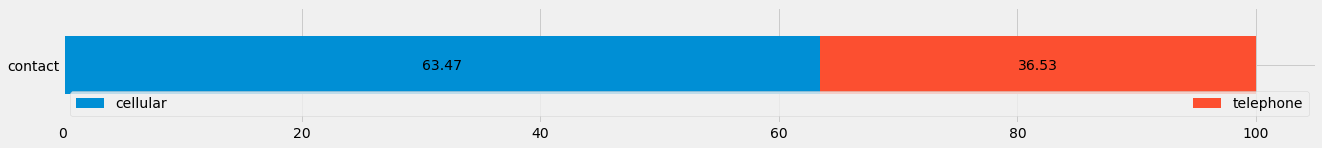

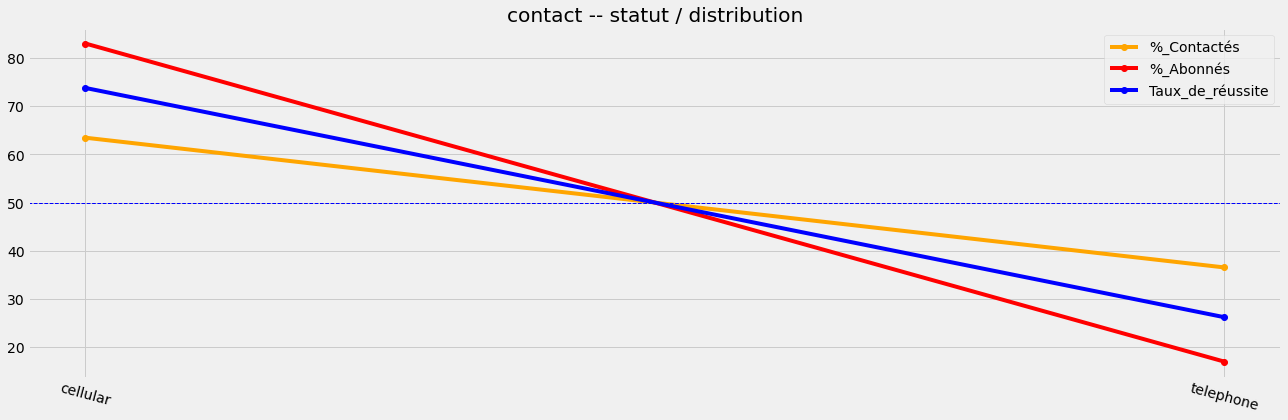

In [24]:
cat_visualisation(dataset, 'contact')

les clients contactés par téléphone portable, **répond plus positivement** à la compagne.

In [25]:
dataset.loc[dataset["month"] == "jan", "month_int"] = 1
dataset.loc[dataset["month"] == "feb", "month_int"] = 2
dataset.loc[dataset["month"] == "mar", "month_int"] = 3
dataset.loc[dataset["month"] == "apr", "month_int"] = 4
dataset.loc[dataset["month"] == "may", "month_int"] = 5
dataset.loc[dataset["month"] == "jun", "month_int"] = 6
dataset.loc[dataset["month"] == "jul", "month_int"] = 7
dataset.loc[dataset["month"] == "aug", "month_int"] = 8
dataset.loc[dataset["month"] == "sep", "month_int"] = 9
dataset.loc[dataset["month"] == "oct", "month_int"] = 10
dataset.loc[dataset["month"] == "nov", "month_int"] = 11
dataset.loc[dataset["month"] == "dec", "month_int"] = 12

dataset['month_int'] = dataset['month_int'].astype(int)

Mois de : 3- Mars 4-Avril 5-Mai 6-Juin 7-Juillet 8-Aout 9-Septembre 10-Octobre 11-Novembre 12-Décembre


,3,4,5,6,7,8,9,10,11,12
%_Contactés,1.325629,6.390211,33.429640,12.911528,17.417694,14.999514,1.383898,1.743226,9.956784,0.441876
%_Abonnés,5.948276,11.616379,19.094828,12.047414,13.987069,14.116379,5.517241,6.788793,8.965517,1.918103
Taux_de_réussite,19.789383,8.017538,2.517225,4.114469,3.542906,4.149702,17.581428,17.174288,3.969621,19.143439


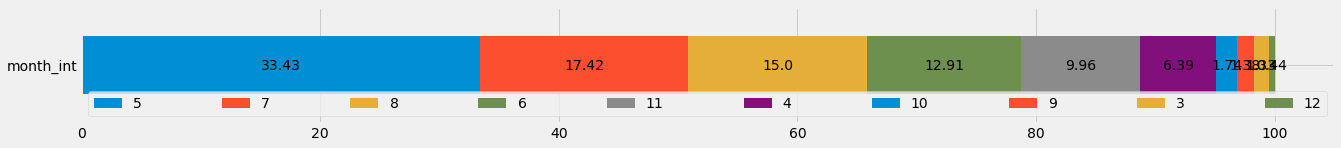

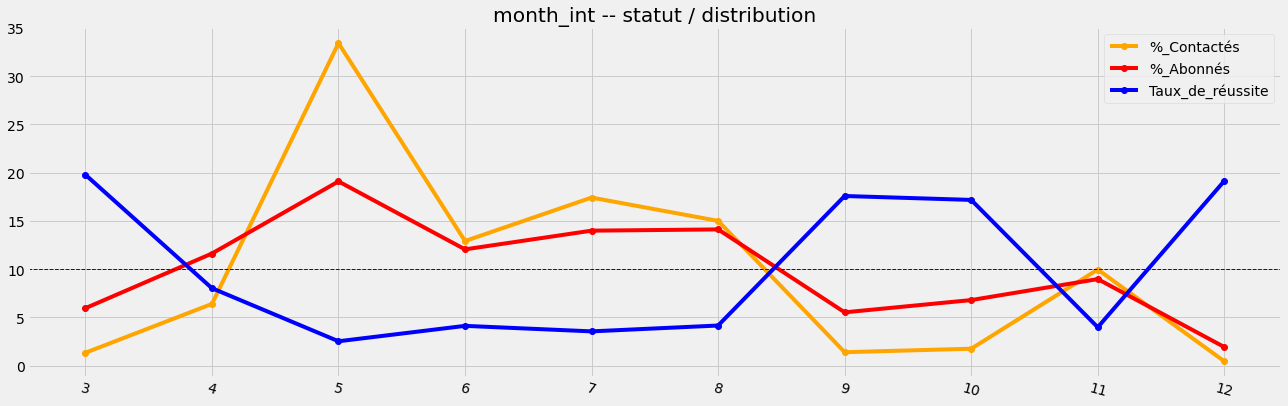

In [26]:
print ('Mois de : 3- Mars 4-Avril 5-Mai 6-Juin 7-Juillet 8-Aout 9-Septembre 10-Octobre 11-Novembre 12-Décembre')
cat_visualisation(dataset, 'month_int', False)

In [27]:
dataset.drop(['month_int'], axis = 1, inplace=True)

In [28]:
dataset.loc[dataset["day_of_week"] == "mon", "day_of_week_int"] = 1
dataset.loc[dataset["day_of_week"] == "tue", "day_of_week_int"] = 2
dataset.loc[dataset["day_of_week"] == "wed", "day_of_week_int"] = 3
dataset.loc[dataset["day_of_week"] == "thu", "day_of_week_int"] = 4
dataset.loc[dataset["day_of_week"] == "fri", "day_of_week_int"] = 5

dataset['day_of_week_int'] = dataset['day_of_week_int'].astype(int)

Jour de Semaine : 1- Lundi  2-Mardi 3-Mercredi 4-Jeudi 5-Vendredi


,1,2,3,4,5
%_Contactés,20.671069,19.641643,19.748470,20.935709,19.003108
%_Abonnés,18.254310,20.538793,20.452586,22.521552,18.232759
Taux_de_réussite,17.663767,20.912480,20.717202,21.516066,19.190485


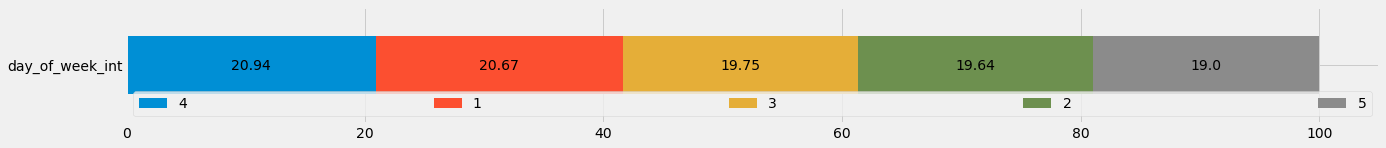

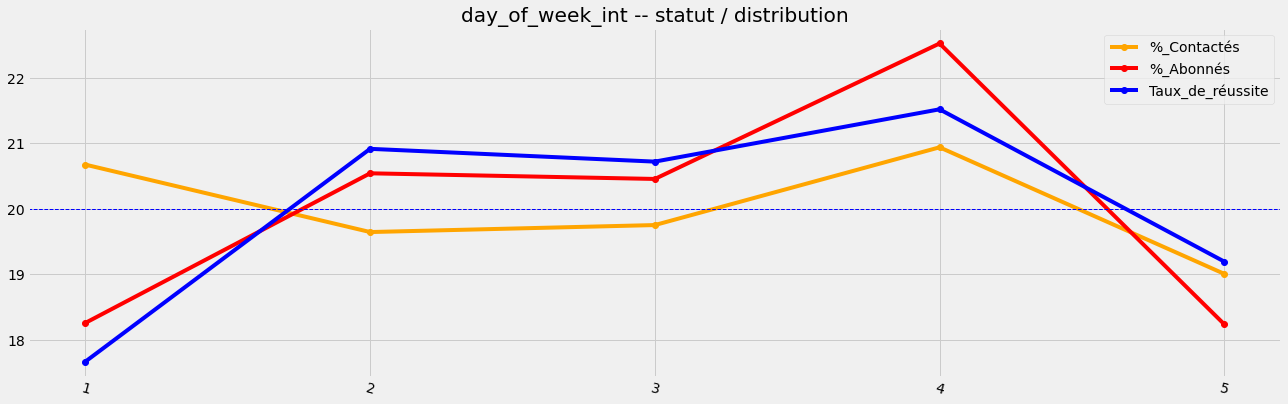

In [29]:
print ('Jour de Semaine : 1- Lundi  2-Mardi 3-Mercredi 4-Jeudi 5-Vendredi')
cat_visualisation(dataset, 'day_of_week_int', False)

,success,failure,nonexistent
%_Contactés,3.333495,0.344761,96.321744
%_Abonnés,19.267241,1.573276,79.159483
Taux_de_réussite,51.764986,40.872953,7.362061


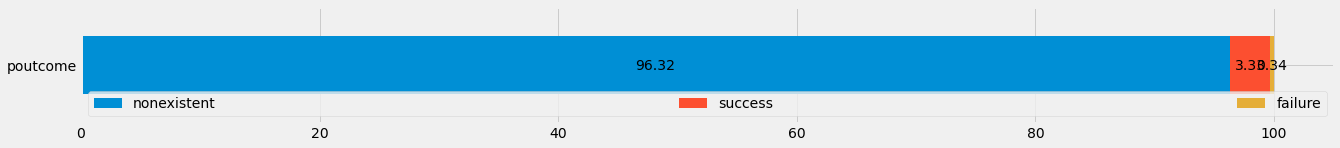

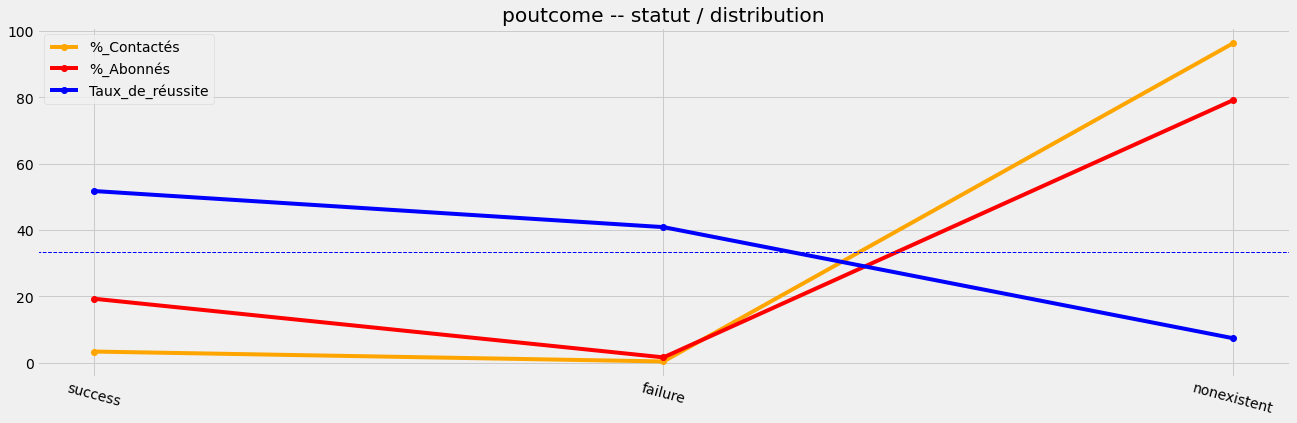

In [30]:
cat_visualisation(dataset, "poutcome")

In [31]:
dataset.drop(['day_of_week_int'], axis = 1, inplace=True)

le résultat de la campagne marketing précédente, **influence positivement** le taux de réussite de compagne en cours

## Analysis of numerical variables

In [32]:
import seaborn as sns

In [33]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.061086,0.360286,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


**"pdays"** a la valeur 999 qui est indiquée car les clients n'ont jamais été contactés auparavant.
**"duration"** a une valeur en seconds

L'âge moyen est d'environ 40 ans. (Minimum: 17 ans et maximum: 98 ans.) 

**Remarque:**  Il n'y a pas beaucoup d'informations que nous pouvons tirer de l'ensemble de données descriptives puisque la plupart de nos données descriptives ne se trouvent pas dans les colonnes «numériques» mais dans les «colonnes catégorielles».

In [34]:
### Feature Numérique
numerical_cols = list(dataset.select_dtypes(exclude=['object']))
numerical_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

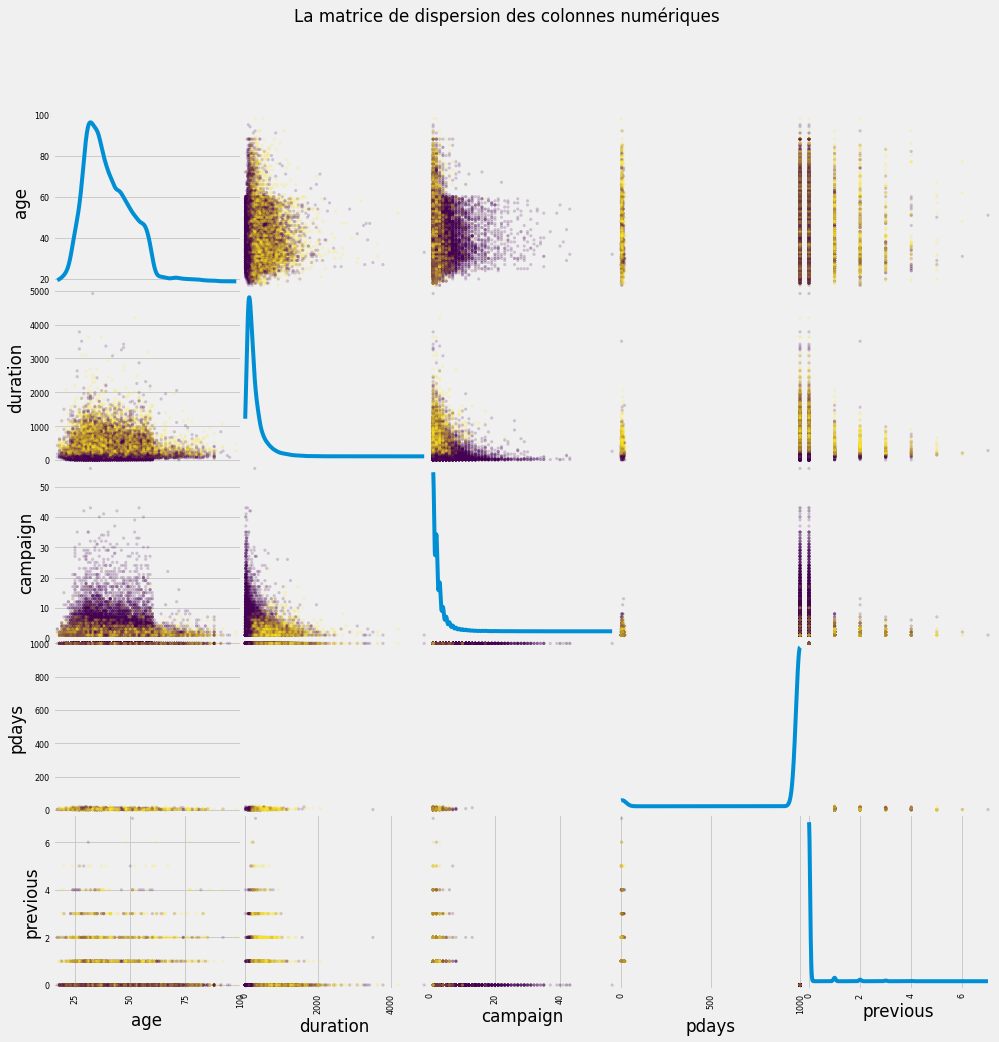

In [35]:
from pandas.plotting import scatter_matrix
matrix = scatter_matrix(dataset[['age','duration','campaign','pdays','previous']],
                        c = dataset.replace({'no':0,'yes':1},inplace=False)['label'], 
                        figsize=(15,15), 
                        alpha=0.2, grid = True, diagonal = 'kde', 
                        s=10, marker = 'o')
plt.suptitle('La matrice de dispersion des colonnes numériques')
plt.show()

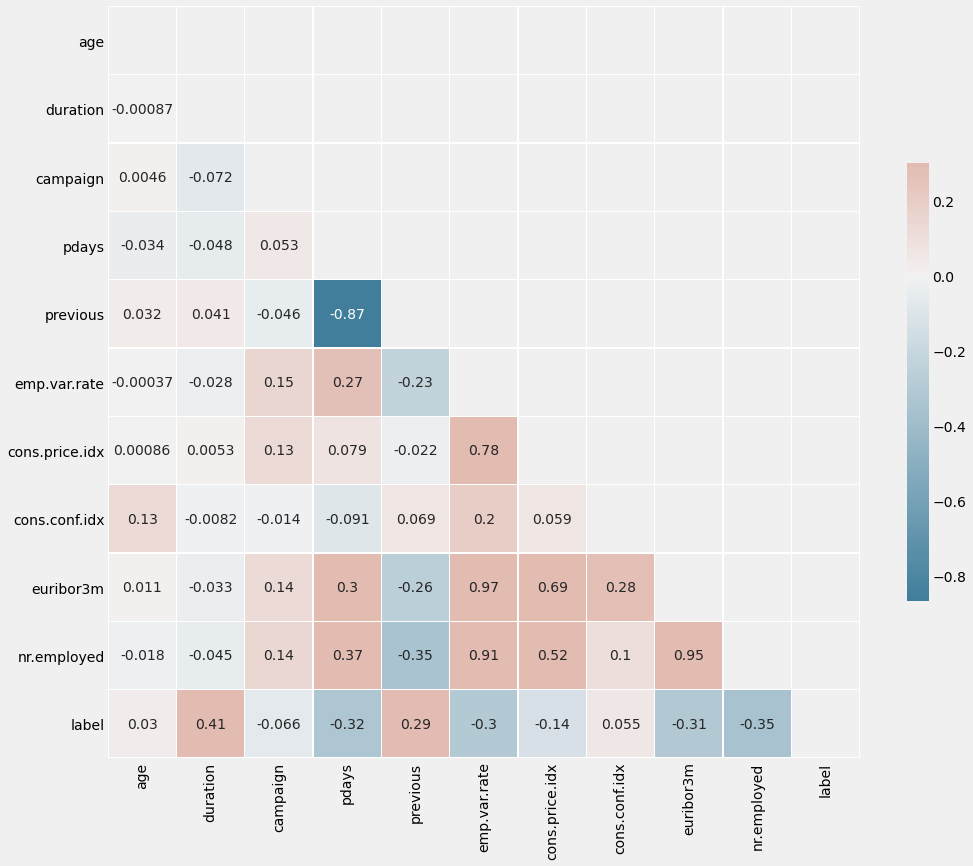

In [36]:
data_corr = dataset.copy()
data_corr['label'].replace({'no':0,'yes':1},inplace=True)
data_corr = data_corr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(data_corr, dtype=bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

fig, ax = plt.subplots(figsize=(15,15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot  =  True, linewidths=.5, fmt='.2g', cbar_kws={"shrink": .5})

selon la matrice de corrélation et la carte thermique, les observations ont été faites comme suit:

- La forte corrélation de «label» est avec la «duration», <br> et une corrélation modérée avec les «previous» et «pdays» // «euribor3m» et «nr.employed»

- Les données sont non linéaires, asymétriques, par conséquent, la sélection des caractéristiques ne dépendra pas du facteur de corrélation.

Notez que les attributs du contexte social et économique  «euribor3m», «nr.employed» et «euribor3m», «emp.var.rate» ont une forte corrélation entre eux.

# Visualisation des **donées** <a name= '3'></a>

### Ralation durée et nombre d'appel

In [37]:
dataset['duration_minute'] = dataset['duration'].apply(lambda n:n/60).round(2)

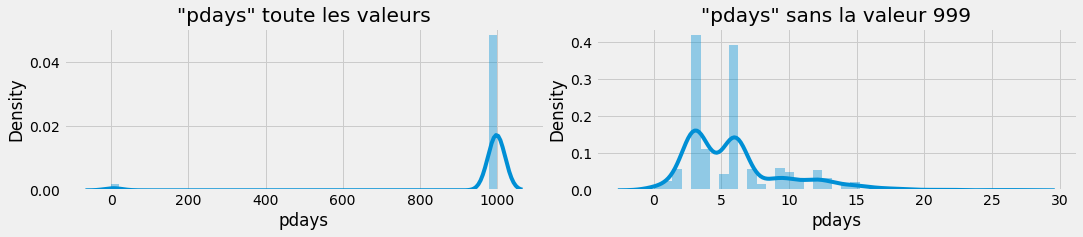

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))
fig.tight_layout()
axes[0].set_title('"pdays" toute les valeurs')
sns.distplot(dataset['pdays'],kde=True, ax=axes[0])
axes[1].set_title('"pdays" sans la valeur 999')
sns.distplot(dataset.loc[dataset.pdays != 999, 'pdays'],kde=True, ax=axes[1])
plt.show()

In [39]:
dataset.loc[(dataset['pdays']==999), 'pdays_cat'] = 0 # Jamais contacté
dataset.loc[(dataset['pdays'] <=7) , 'pdays_cat'] = 1 # Moins d'une Semaine
dataset.loc[(dataset['pdays'] >7) & (dataset['pdays']<=14), 'pdays_cat'] = 2 # Moins de deux Semaines
dataset.loc[(dataset['pdays'] >14) & (dataset['pdays'] !=999), 'pdays_cat'] = 4 # Au dela de deux semaines
dataset['pdays_cat'] = dataset['pdays_cat'].astype(int)

Afin d'éviter de considéré pdays=999 comme valeur aberrante ont la remplace par -1 (**False**)

In [40]:
dataset.pdays.replace({999: -1}, inplace=True)

0- Jamais contatcé avant 1-Moins de d'une semaine 2-Moins de Deux Semaines 3- Plus de Deux semaines


,0,1,2,4
%_Contactés,96.321744,2.857628,0.670098,0.150529
%_Abonnés,79.159483,16.681034,3.383621,0.775862
Taux_de_réussite,4.874710,34.617814,29.943146,30.564329


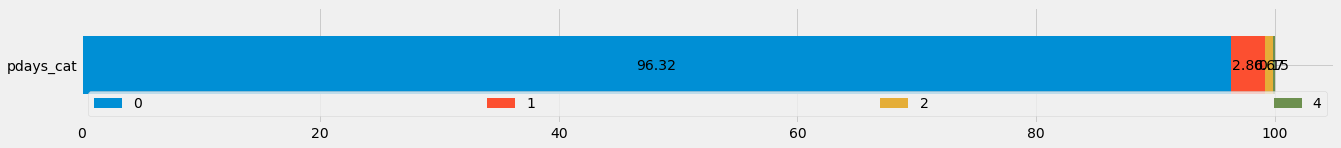

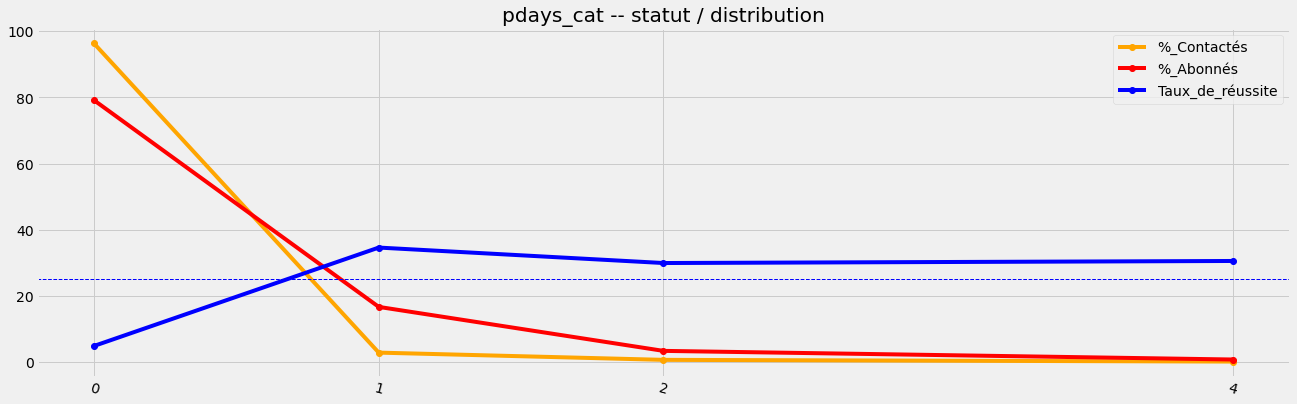

In [41]:
print ("0- Jamais contatcé avant 1-Moins de d'une semaine 2-Moins de Deux Semaines 3- Plus de Deux semaines")
cat_visualisation(dataset, "pdays_cat", False)

La plupart des clients n'ont pas étais contatcer avant cette compagne.
On constate que en moyen les client déjà contactés ont un taux de réussite de 30% le nombre de jours écoulés depuis la dernière campagne n'influence le taux, mais le faite que le client a déjà étais contacté.

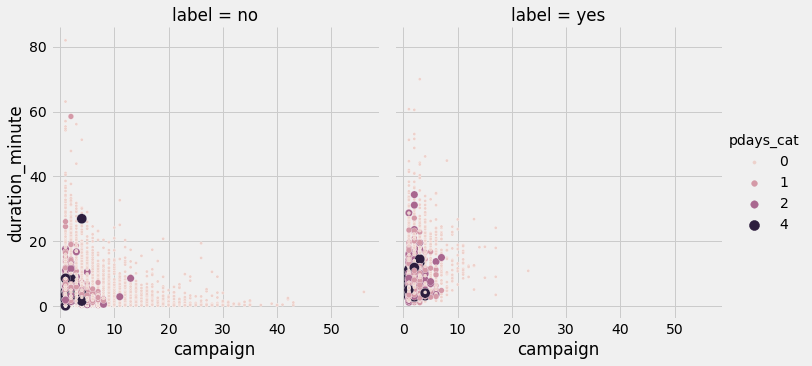

In [42]:
sns.relplot(
    data=dataset, x="campaign", y="duration_minute",
    col="label", size="pdays_cat",sizes = (10,100),hue= "pdays_cat",
    kind="scatter"
)

Taux d'abonnement plus élevé lors le nombre d'appels est de moins 5

Nous constatons que le nombre d'appel influence négativement la durée des appels, sois les clients ont appris le script de la campagne et dans certain l'appel ne dépasse pas quelque secondes.
Le pdays confirme que les clients déja contacté prend la décision d'adhéré ou pas dans moins de 25 minutes et surtout avec un maximum dans 7 appels.

Nous conseillons pour la réduction des coûts d'appel (nombre et durée), d'appliquer les règle suivante :
-  moins de 10 appel d'une durée maximum de 30 minutes

In [43]:
dataset.drop(['pdays_cat', 'duration_minute'], axis = 1, inplace=True)

### Ralation Age


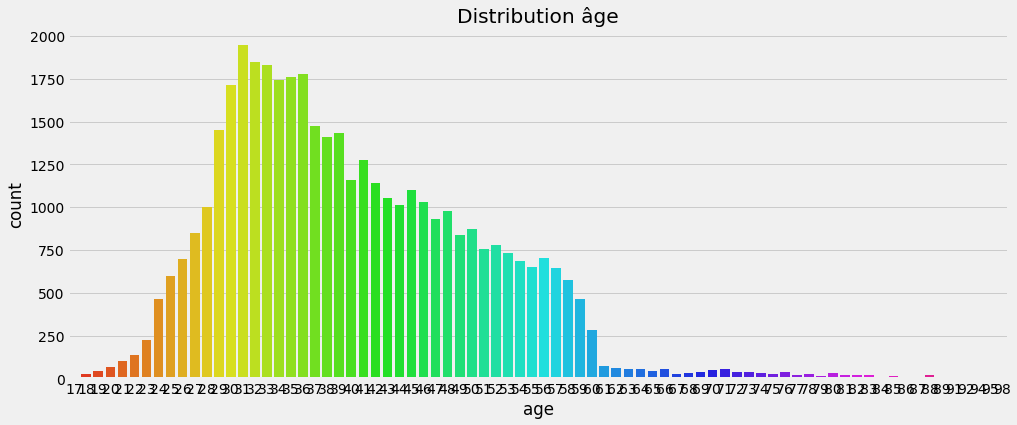

Clients agée de moins de 60 : 10.42 % abonné
Clients agée de plus de 60 : 45.49 % abonné


In [44]:
# distributions. Age
plt.rcParams["figure.figsize"] = (15, 6)
sns.countplot(dataset["age"], palette = "hsv")
plt.title("Distribution âge")
plt.show()
adult = round((dataset[(dataset.age < 60) & (dataset.label=='yes')]['age'].count()/sum(dataset.age < 60))*100,2)
senior = round((dataset[(dataset.age > 60) & (dataset.label=='yes')]['age'].count()/sum(dataset.age > 60))*100,2)
print('Clients agée de moins de 60 :',adult,"% abonné")
print('Clients agée de plus de 60 :',senior,"% abonné")

In [45]:
#putting age into bins
dataset.loc[dataset["age"] < 30,  'age_bin'] = 20
dataset.loc[(dataset["age"] >= 30) & (dataset["age"] <= 39), 'age_bin'] = 30
dataset.loc[(dataset["age"] >= 40) & (dataset["age"] <= 49), 'age_bin'] = 40
dataset.loc[(dataset["age"] >= 50) & (dataset["age"] <= 59), 'age_bin'] = 50
dataset.loc[dataset["age"] >= 60, 'age_bin'] = 60

,20.0,30.0,40.0,50.0,60.0
%_Contactés,13.763718,41.123628,25.555987,16.660192,2.896475
%_Abonnés,19.870690,36.961207,17.974138,15.021552,10.172414
Taux_de_réussite,19.350232,12.055218,9.425205,12.090920,47.078424


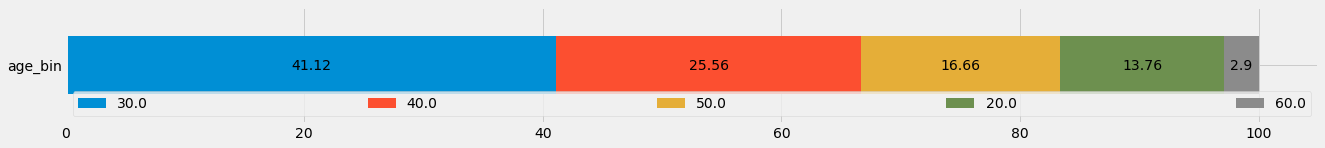

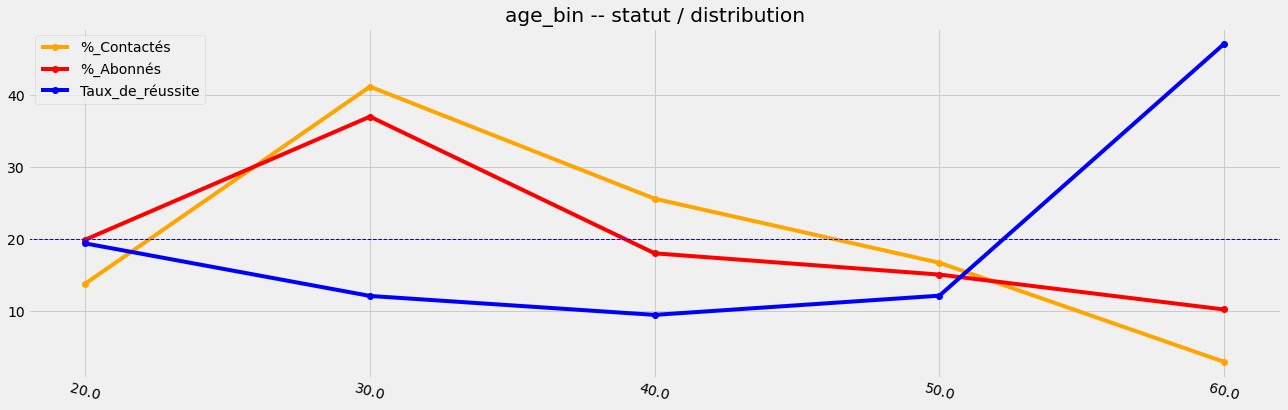

In [46]:
cat_visualisation(dataset, "age_bin", False)

on constat que les clients de plus de 60 ans ont le taux d'abonnement le plus élevé. 

- Environ 17% des abonnements provenaient de clients âgés de 18 à 29 ans.
- Plus de 50% des abonnements sont fournis par les 18-29 et les plus de 60+.

ce qui explique que les «student» et les «retired» ont le taux de réussite le plus important de la campagne.

In [47]:
dataset.drop(['age_bin'], axis = 1, inplace=True)

### Ralation Economique

In [48]:
#putting nr.employed into bins
dataset.loc[dataset["nr.employed"] < 5000,  'employer_bin'] = 5000
dataset.loc[(dataset["nr.employed"] >= 5000) & (dataset["nr.employed"] < 5050), 'employer_bin'] = 5050
dataset.loc[(dataset["nr.employed"] >= 5050) & (dataset["nr.employed"] < 5100), 'employer_bin'] = 5100
dataset.loc[(dataset["nr.employed"] >= 5010) & (dataset["nr.employed"] < 5150), 'employer_bin'] = 5150
dataset.loc[dataset["nr.employed"] >= 5100, 'employer_bin'] = 5200

,5000.0,5050.0,5150.0,5200.0
%_Contactés,3.418471,1.578130,27.775080,67.228319
%_Abonnés,15.172414,7.952586,48.017241,28.857759
Taux_de_réussite,38.141735,43.306126,14.860020,3.692120


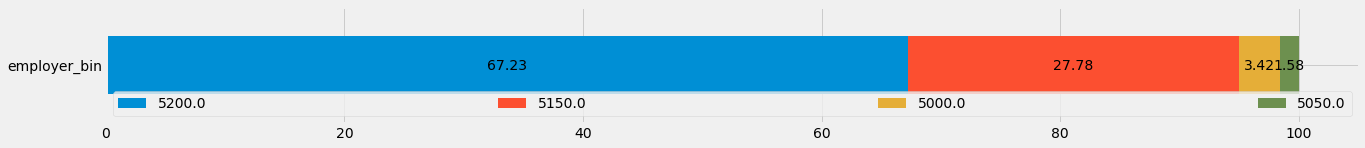

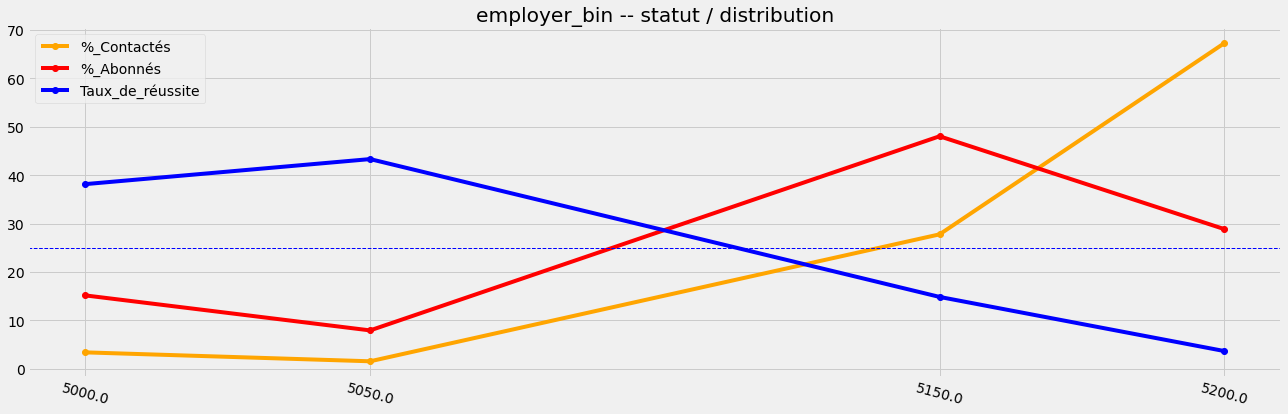

In [49]:
cat_visualisation(dataset, "employer_bin", False)

«Nr.employed», qui est le nombre d'employés dans la banque, a un effet positif pour inciter les gens à souscrire au dépôt à terme. Cela peut être dû au fait que plus la banque a d'employés, plus cette banque est influente et prestigieuse.

In [50]:
dataset.drop(['employer_bin'], axis = 1, inplace=True)

,-3.4,-3.0,-2.9,-1.8,-1.7,-1.1,-0.2,-0.1,1.1,1.4
%_Contactés,2.600272,0.417597,4.037584,22.297757,1.876760,1.541711,0.024279,8.941925,18.847723,39.414393
%_Abonnés,9.784483,1.896552,12.801724,31.487069,8.685345,6.487069,0.021552,5.000000,5.172414,18.663793
Taux_de_réussite,15.733215,18.988234,13.257618,5.905059,19.348254,17.592696,3.711539,2.338270,1.146866,1.978250


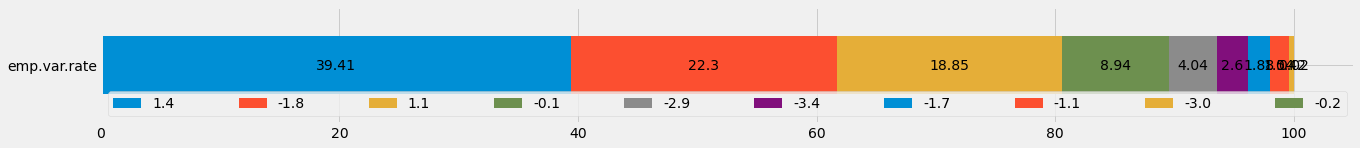

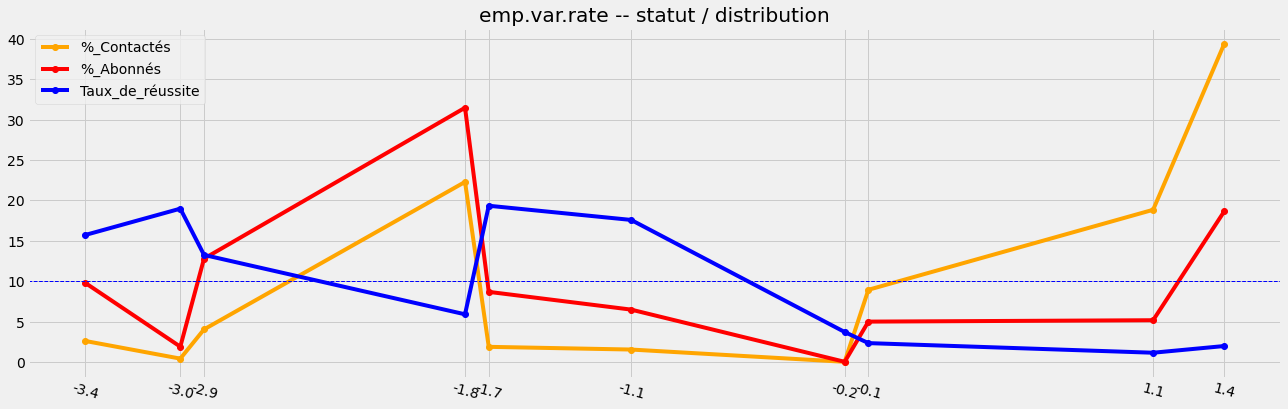

In [51]:
cat_visualisation(dataset, "emp.var.rate", False)

Le taux de variation de l'emploi (emp.var.rate) a une influence négative, ce qui signifie que le changement du taux d'emploi rendra les clients moins susceptibles de souscrire un dépôt à terme.

Cela a du sens car le taux d'emploi est un indicateur de la macroéconomie. Un taux d'emploi stable dénote un environnement économique stable dans lequel les gens sont plus confiants pour investir.

In [52]:
#putting euribor3m into bins
dataset.loc[dataset["euribor3m"] < 1,  'euro_bin'] = 1
dataset.loc[(dataset["euribor3m"] >= 1) & (dataset["euribor3m"] < 2), 'euro_bin'] = 2
dataset.loc[(dataset["euribor3m"] >= 2) & (dataset["euribor3m"] < 3), 'euro_bin'] = 3
dataset.loc[(dataset["euribor3m"] >= 4) & (dataset["euribor3m"] < 5), 'euro_bin'] = 4
dataset.loc[dataset["euribor3m"] >= 5, 'euro_bin'] = 5

,1.0,2.0,4.0,5.0
%_Contactés,9.447710,23.335114,67.178316,0.038859
%_Abonnés,38.327226,32.830351,28.669972,0.172451
Taux_de_réussite,39.279883,13.620349,4.133368,42.966400


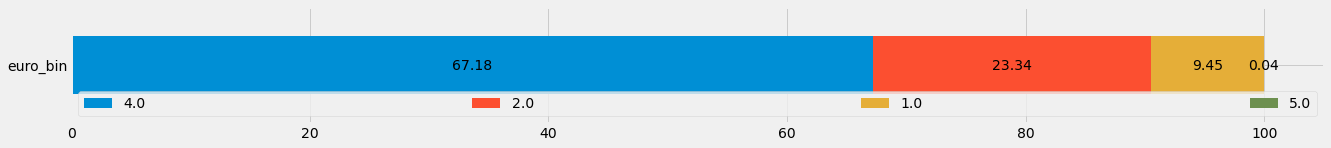

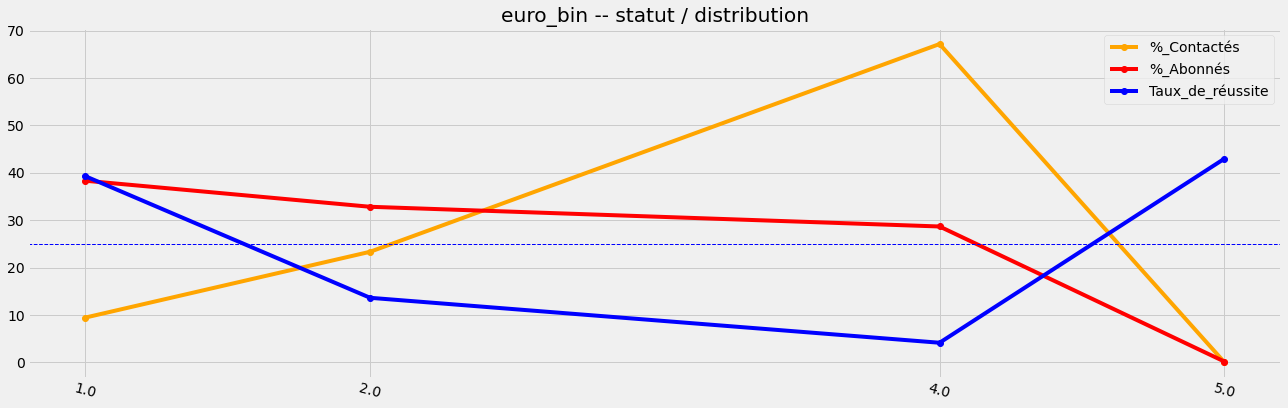

In [53]:
cat_visualisation(dataset, "euro_bin", False)

In [54]:
dataset.drop(['euro_bin'], axis = 1, inplace=True)

«Euribor3m» est une autre variable importante, qui désigne le taux euribor 3 mois.

Cet indicateur est basé sur les taux d'intérêt interbancaires moyens de la zone euro. Cela a également un effet positif puisque plus le taux d'intérêt est élevé, plus le client dépensera volontiers son argent en outils financiers.

# Selection des **attributs**  <a name= '4'></a>

Ont prendras tous les attributs sauf ceux en relation avec les appels (durée et nombre d'appel ces entrée ne devrait être incluse qu'à des fins de référence)

ces attributs affecte fortement la cible de sortie (par exemple pour la durée, si durée = 0, label = 'non'). Pourtant, la durée n'est pas connue avant qu'un appel ne soit effectué. 

De plus, si durée != 0, label est évidemment connu. 

Pareille pour le nombre d'appels puisque si on n'appel jamais le clients label ne peu être que 'non'


In [55]:
dataset.drop(['duration', 'campaign'], axis = 1, inplace = True)

### one hot encoder

In [56]:
dataset = pd.get_dummies(dataset,columns=['housing','loan','job','marital', \
                                     'education','contact','month','day_of_week', \
                                     'poutcome','default'], drop_first=True)

In [57]:
dataset.label.replace({'yes': 1, 'no': 0}, inplace=True)

In [58]:
from sklearn.model_selection import train_test_split

test_size= 0.10
seed = 1
X_train, X_test, Y_train, Y_test= train_test_split(dataset.drop('label',axis = 1), 
                                                   dataset['label'].values,
                                                   test_size=test_size, random_state=seed)

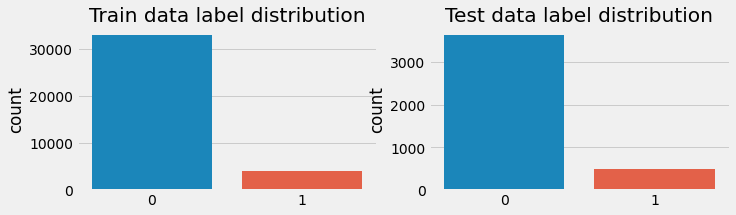

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
fig.tight_layout()
axes[0].set_title("Train data label distribution")
axes[1].set_title("Test data label distribution")
ax = sns.countplot(Y_test, ax=axes[1])
ax = sns.countplot(Y_train, ax=axes[0])

# Création **Model ML** <a name= '5'></a>

### Fonction Plot ROC_CURVE

In [60]:
def roc_curve_plot(model):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import auc

    model.fit(X_train, Y_train)
    y_score = model.predict_proba(X_test)[:,1]
    

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(Y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label='ROC curve du model: %s (area = %0.2f)' %(type(model).__name__ ,roc_auc))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'b--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.axis([0,1,0,1])
    plt.ylabel('Vrai Positive')
    plt.xlabel('Faux Positive') 

## Exploration de plusieurs Modèles Supervisé. 


### Cross Validation

In [61]:
def supervised_model():

  from sklearn.linear_model import LogisticRegression

  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.ensemble import RandomForestClassifier
  
  from sklearn.ensemble import GradientBoostingClassifier

  models = []
  models.append((LogisticRegression()))
  

  models.append((KNeighborsClassifier()))
  models.append((DecisionTreeClassifier()))
  models.append((RandomForestClassifier()))

  #models.append((GradientBoostingClassifier()))


  from sklearn.model_selection import KFold 
  from sklearn.model_selection import cross_val_score

  print ("Supervised Models")
  for i in range(len(models)): print('#',end='')
  results_e2 = []
  names_e2 = []
  split = 10
  f1_scores_model = []
  plt.figure(figsize=(20,6))
  
  for model in models:
      model_name = type(model).__name__
      print(model_name)
      # define how to split off validation data ('kfold' how many folds)
      kfold = KFold(n_splits=split, random_state=seed)    
      # train the model
      cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring="f1_micro")    
    
      results_e2.append(cv_results)
      names_e2.append(model_name)
      score_data = dict()
      score_data['Classifier'] = model_name
      score_data['CV_Result Mean'] = cv_results.mean()
      score_data['CV_Result STD'] = cv_results.std()
    
      f1_scores_model.append(score_data)
      
      roc_curve_plot(model)

      for i in range(len(model_name)+2) : print('', end=chr(8))
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc='lower right')
  plt.show()
  
  fig = plt.figure(figsize=(20,6))
  ax = fig.add_subplot(111)
  plt.boxplot(results_e2)
  fig.suptitle('Cross Validation With Scoring "f1_micro"')
  ax.set_xticklabels(names_e2)
  plt.show()


  df_scores = pd.DataFrame(f1_scores_model)
  return df_scores.sort_values('CV_Result Mean', ascending=False).T

Supervised Models
####LogisticRegression
KNeighborsClassifier
DecisionTreeClassifier
RandomForestClassifier


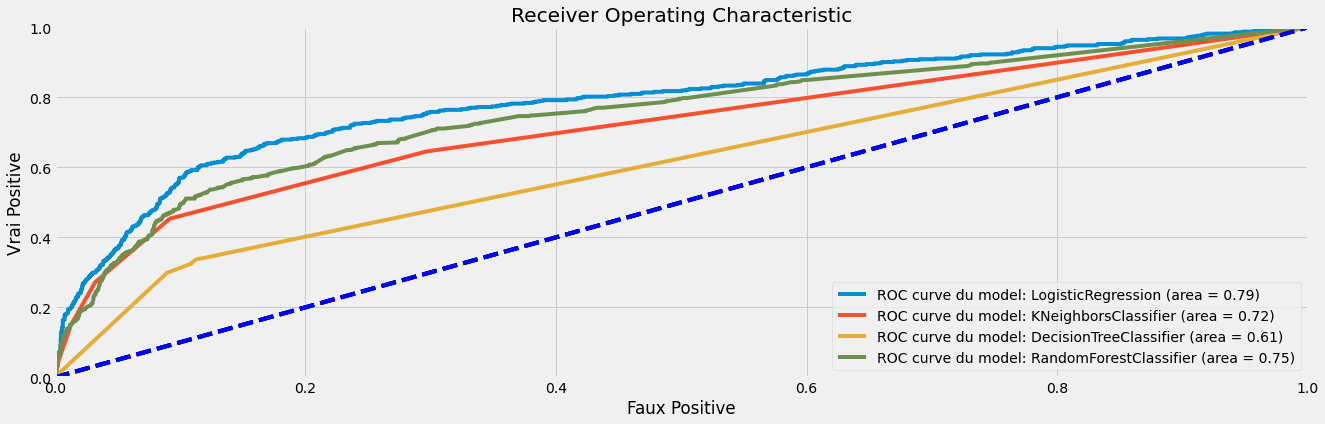

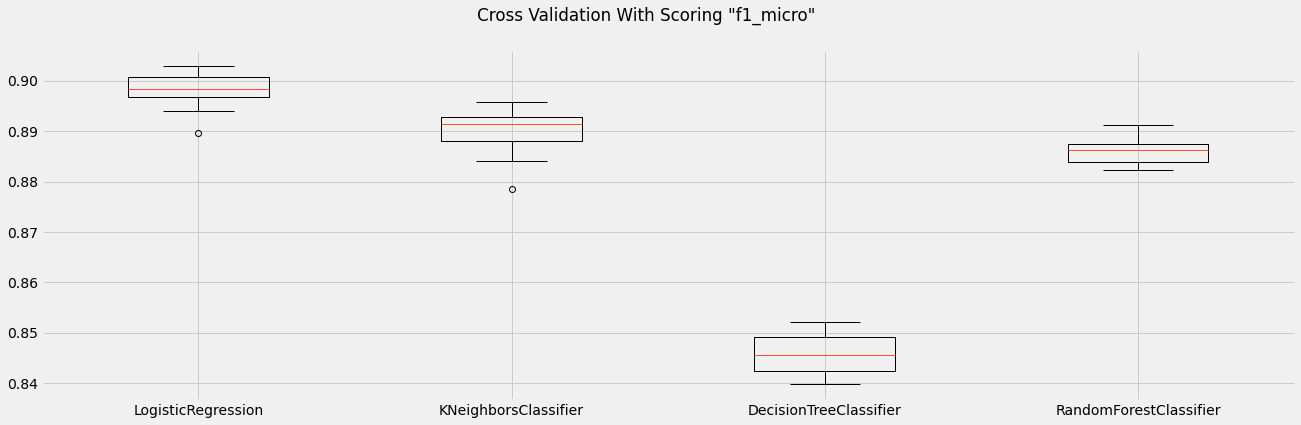

,0,1,3,2
Classifier,LogisticRegression,KNeighborsClassifier,RandomForestClassifier,DecisionTreeClassifier
CV_Result Mean,0.897974,0.889827,0.886239,0.846017
CV_Result STD,0.00371919,0.00491524,0.00298041,0.00411652


In [62]:
supervised_model()

**Dans ces comparatifs le model GradientBoostingClassifier est celui qui a les meilleurs résultat.**

### GridSearchCV du Model Selectionner

In [63]:
def gridCV_lgc():

  from sklearn.model_selection import GridSearchCV

  from sklearn.metrics import accuracy_score
  from sklearn.metrics import precision_score
  from sklearn.metrics import recall_score
  from sklearn.metrics import make_scorer
  from sklearn.metrics import confusion_matrix  
  from sklearn.metrics import classification_report    

  from sklearn.linear_model import LogisticRegression
  
  estimator = LogisticRegression()
  nb_cv = 2
  scoring = {'accuracy': make_scorer(accuracy_score),
             'precision': make_scorer(precision_score),
             'recall':make_scorer(recall_score)}

  parameters = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
  
  print('Grid', parameters)

  clf = GridSearchCV(estimator, parameters,scoring=scoring, refit=False, cv=nb_cv,  n_jobs=-1)
  clf.fit(X_train, Y_train)

  df=pd.DataFrame.from_dict(clf.cv_results_)
  df['accuracy_score']=(df['split0_test_accuracy']+df['split1_test_accuracy'])/nb_cv
  best_param = df.loc[df['accuracy_score'].idxmax()]['params']
  
  print('Best Paramaitre :', best_param)
  
  lgc = LogisticRegression(**best_param)
  lgc.fit(X_train, Y_train)

  predictions = lgc.predict(X_test)

  #vrais négatifs est 0,0 , les faux négatifs sont 1,0 , les vrais positifs sont 1,1  et les faux positifs sont 0,1 .

  cm = confusion_matrix(Y_test, predictions)
  cm = (cm * 100) / cm.sum(axis=0)
  cm = np.round(cm,2)
  tn, fn, tp, fp = cm[0,0], cm[1,0], cm[1,1], cm[0,1]

  print('\n Vrais positif :', tp, '\n Vrais négatif :', tn, '\n---------------------------------\n Faux positif :' , fp, '\n Faux négatif :', fn)

  cm = np.array([[tp , fp], [ tn , fn]])


  ax= plt.subplot()
  cm_plt = sns.heatmap(cm, annot=True, fmt=".2f", ax = ax)

  for t in cm_plt.texts: t.set_text(t.get_text() + " %")

  ax.set_ylabel('Predicted labels');ax.set_xlabel('True labels')
  ax.set_title('Confusion Matrix'); 
  ax.xaxis.set_ticklabels(['Vrais', 'Faux']); ax.yaxis.set_ticklabels(['POSITIF', 'NEGATIF'])
  plt.show()
  
  print(classification_report(Y_test, predictions))

Grid {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
Best Paramaitre : {'C': 0.01, 'penalty': 'l2'}

 Vrais positif : 72.88 
 Vrais négatif : 89.53 
---------------------------------
 Faux positif : 27.12 
 Faux négatif : 10.47


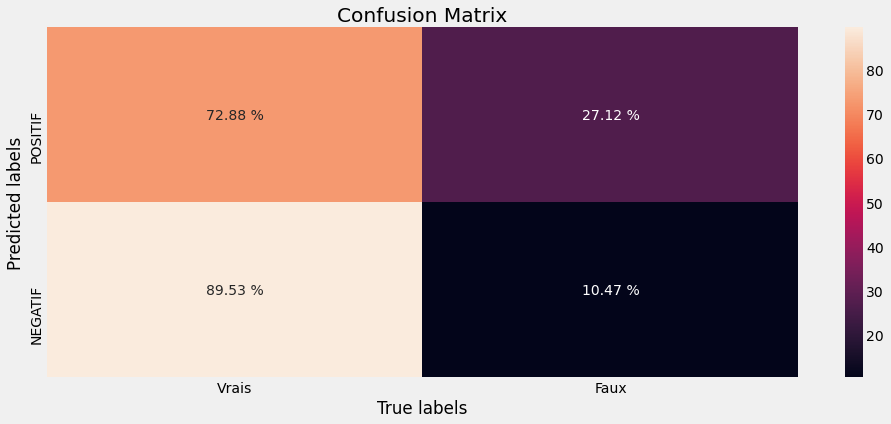

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      3614
           1       0.73      0.17      0.28       505

    accuracy                           0.89      4119
   macro avg       0.81      0.58      0.61      4119
weighted avg       0.87      0.89      0.86      4119



In [64]:
gridCV_lgc()

## Exploration des Modèles Non-Supervisé.

### Kmeans


In [65]:
def unsupervised_model():

  from sklearn.metrics import roc_curve
  from sklearn.metrics import auc

  from sklearn.metrics.cluster import v_measure_score

  from sklearn.cluster import KMeans 

  models = []
  models.append((KMeans(n_clusters=2)))


  print ("unSupervised Models")
  for i in range(len(models)): print('#',end='')


  split = 10
  f1_scores_model = []
  plt.figure(figsize=(20,6))
  
  for model in models:
      model_name = type(model).__name__
      print(model_name)

      y_score = model.fit_predict(X_train, Y_train)
      
      score_data = dict()
      score_data['Classifier'] = model_name
      score_data['v_measure_score'] = v_measure_score(y_score, Y_train)

      f1_scores_model.append(score_data)
      fpr = dict()
      tpr = dict()
      roc_auc = dict()
      fpr, tpr, _ = roc_curve(Y_train, y_score)
      roc_auc = auc(fpr, tpr)

      plt.plot(fpr, tpr, label='ROC curve du model: %s (area = %0.2f)' %(type(model).__name__ ,roc_auc))
      plt.legend(loc = 'lower right')
      plt.plot([0, 1], [0, 1],'b--')
      plt.xlim([0, 1])
      plt.ylim([0, 1])
      plt.axis([0,1,0,1])
      plt.ylabel('Vrai Positive')
      plt.xlabel('Faux Positive') 

      for i in range(len(model_name)+2) : print('', end=chr(8))
  
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc='lower right')
  plt.show()
  
  df_scores = pd.DataFrame(f1_scores_model)
  return df_scores.sort_values('v_measure_score', ascending=False).T

unSupervised Models
#KMeans


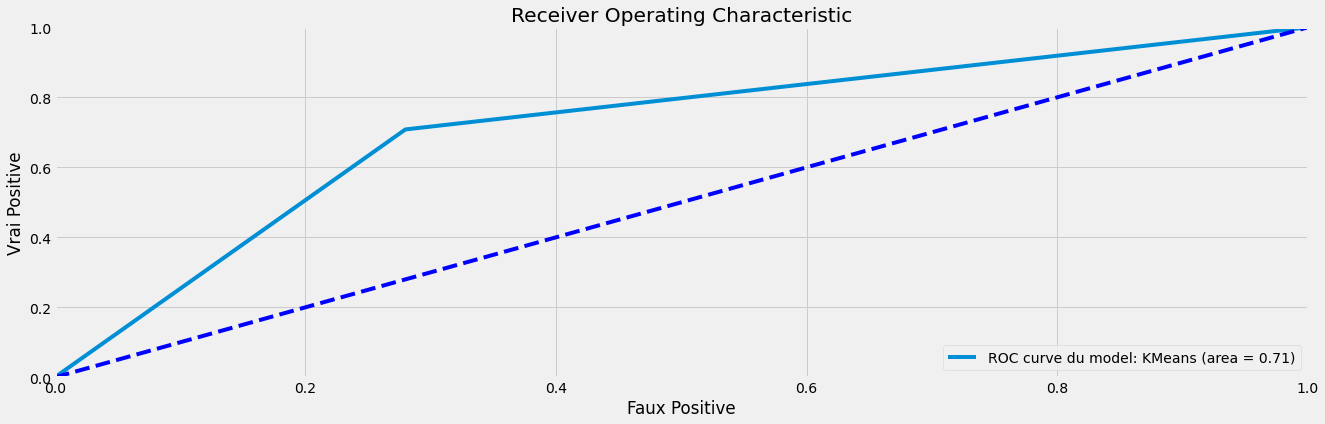

,0
Classifier,KMeans
v_measure_score,0.078364


In [66]:
unsupervised_model()

In [67]:
def gridCV_Kmean():

  from sklearn.model_selection import GridSearchCV

  from sklearn.metrics import accuracy_score
  from sklearn.metrics import precision_score
  from sklearn.metrics import recall_score
  from sklearn.metrics import make_scorer
  from sklearn.metrics import confusion_matrix  
  from sklearn.metrics import classification_report    

  from sklearn.cluster import KMeans 
  
  estimator = KMeans()
  nb_cv = 2
  scoring = {'accuracy': make_scorer(accuracy_score),
             'precision': make_scorer(precision_score),
             'recall':make_scorer(recall_score)}

  parameters = {'n_clusters' : [2],
                'init' : ['k-means++', 'random', 'ndarray', 'callable'],
                'precompute_distances' : ['auto', 'True', 'False']
                }
  
  print('Grid', parameters)

  clf = GridSearchCV(estimator, parameters,scoring=scoring, refit=False, cv=nb_cv,  n_jobs=-1)
  clf.fit(X_train, Y_train)

  df=pd.DataFrame.from_dict(clf.cv_results_)
  df['accuracy_score']=(df['split0_test_accuracy']+df['split1_test_accuracy'])/nb_cv
  best_param = df.loc[df['accuracy_score'].idxmax()]['params']
  
  print('Best Paramaitre :', best_param)
  
  kmns = KMeans(**best_param)
  kmns.fit(X_train, Y_train)

  predictions = kmns.predict(X_test)

  #vrais négatifs est 0,0 , les faux négatifs sont 1,0 , les vrais positifs sont 1,1  et les faux positifs sont 0,1 .

  cm = confusion_matrix(Y_test, predictions)
  cm = (cm * 100) / cm.sum(axis=0)
  cm = np.round(cm,2)
  tn, fn, tp, fp = cm[0,0], cm[1,0], cm[1,1], cm[0,1]

  print('\n Vrais positif :', tp, '\n Vrais négatif :', tn, '\n---------------------------------\n Faux positif :' , fp, '\n Faux négatif :', fn)

  cm = np.array([[tp , fp], [ tn , fn]])


  ax= plt.subplot()
  cm_plt = sns.heatmap(cm, annot=True, fmt=".2f", ax = ax)

  for t in cm_plt.texts: t.set_text(t.get_text() + " %")

  ax.set_ylabel('Predicted labels');ax.set_xlabel('True labels')
  ax.set_title('Confusion Matrix'); 
  ax.xaxis.set_ticklabels(['Vrais', 'Faux']); ax.yaxis.set_ticklabels(['POSITIF', 'NEGATIF'])
  plt.show()
  
  print(classification_report(Y_test, predictions))
  return kmns.labels_

Grid {'n_clusters': [2], 'init': ['k-means++', 'random', 'ndarray', 'callable'], 'precompute_distances': ['auto', 'True', 'False']}
Best Paramaitre : {'init': 'random', 'n_clusters': 2, 'precompute_distances': 'auto'}

 Vrais positif : 4.81 
 Vrais négatif : 72.51 
---------------------------------
 Faux positif : 95.19 
 Faux négatif : 27.49


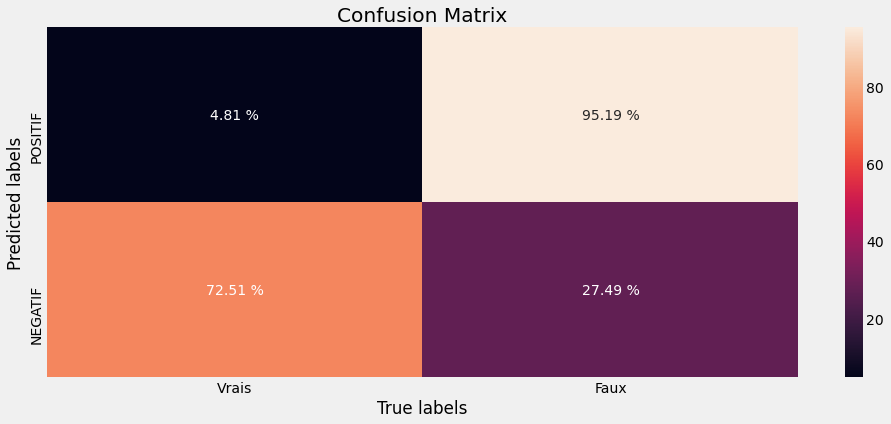

              precision    recall  f1-score   support

           0       0.73      0.27      0.40      3614
           1       0.05      0.26      0.08       505

    accuracy                           0.27      4119
   macro avg       0.39      0.27      0.24      4119
weighted avg       0.64      0.27      0.36      4119



In [68]:
labels = gridCV_Kmean()

# Conclusions  <a name= '6'></a>

cibler les personnes relativement âgées.


